In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bk.load


import matplotlib as mpl
mpl.rcParams["svg.fonttype"] = "none"

In [2]:
def states_durations(local_path = 'Rat08/Rat08-20130713',*args):
    '''
    Return length of each epochs in a dict. 
    '''

    bk.load.current_session_linux(local_path=local_path)
    states = bk.load.states()

    durations = {}
    for name,intervals in states.items():
        durations.update({name:intervals.duration(time_units = 's')})
    return durations

In [3]:
def merge(batch):
    all_states_durations = {'Rem':[],
                            'sws':[],
                            'drowsy':[],
                            'wake':[]}

    for session,states_durations in batch.items():
        for state,durations in states_durations.items():
            all_states_durations.update({state:np.append(all_states_durations[state],durations)})

    return all_states_durations

In [4]:
batch = bk.load.batch(states_durations,linux = True)
all_states = merge(batch)

100%|██████████| 61/61 [00:01<00:00, 55.44it/s]

Batch finished in 1.118974208831787
Some session were not processed correctly
['Rat08-20130720', 'Rat08-20130722']
3.278688524590164 %


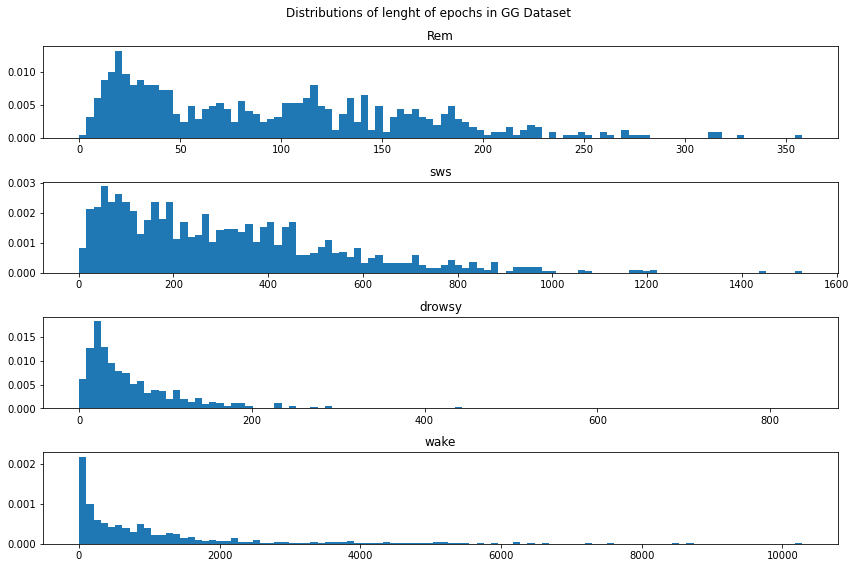

In [5]:
# Plotting 
fig,ax = plt.subplots(4,1,sharex=False,figsize = (12,8))
for ax,(state, durations) in zip(ax,all_states.items()):
    ax.set_title(state)
    ax.hist(durations,100,density= True)
plt.suptitle('Distributions of lenght of epochs in GG Dataset')
plt.tight_layout()
plt.savefig('/home/billel/pCloudDrive/IFM/work/Figures_Gabrielle/states/durations.svg')